Construir Moduladores e Demoduladores em BP
Construir os seguintes moduladores e seus correspondentes demoduladores:

M - ASK; DQPSK; M-PSK e M-QAM.

Para cada um dos moduladores, apresentar o diagrama de constelação do sinal transmitido e recebido após ter passado por um canal awgn com possibilidade de variar a relação Sinal/Ruído.


# Imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache
np.random.seed(40)  # semente para gerar os mesmos números aleatórios

# Constantes


In [2]:
n_simbolos = 1000
amostras_por_simbolo = 160
n_bits = 2
taxa_de_modulacao = 1000 #baud/s
taxa_de_transmissao = taxa_de_modulacao * n_bits #bps
frequencia_central = 500 # Hz
amplitude = 1 # Amplitudade da Portadora em Volts
periodo_de_amostragem = n_simbolos / taxa_de_modulacao / amostras_por_simbolo
frequencia_de_amostragem = 1 / periodo_de_amostragem

# plot
simbolos_no_grafico = 20
show_amostras = simbolos_no_grafico*amostras_por_simbolo
# vetores
tempo = np.linspace(0, n_simbolos / taxa_de_modulacao, n_simbolos * amostras_por_simbolo)

# Portadora


In [3]:
class Onda:
    T = tempo
    def __init__(self,amplitude,frequencia,fase=0) -> None:
        self.a = amplitude
        self.f = frequencia
        self.phase = fase
    
    @property
    def wave(self):
        return self.a*np.cos(2*np.pi*self.f*self.T + self.phase)

portadora = Onda(amplitude,frequencia_central)

# M-ASK


In [13]:
2**np.arange(5)

array([ 1,  2,  4,  8, 16], dtype=int32)

## Modulador


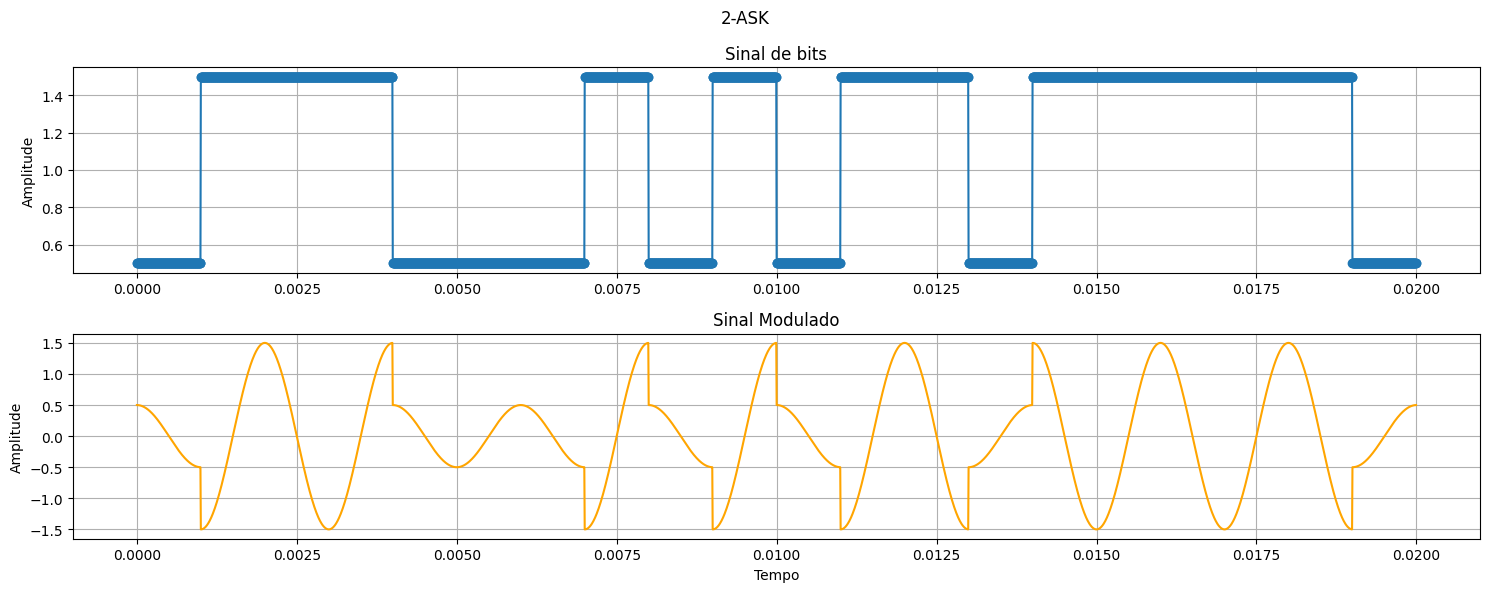

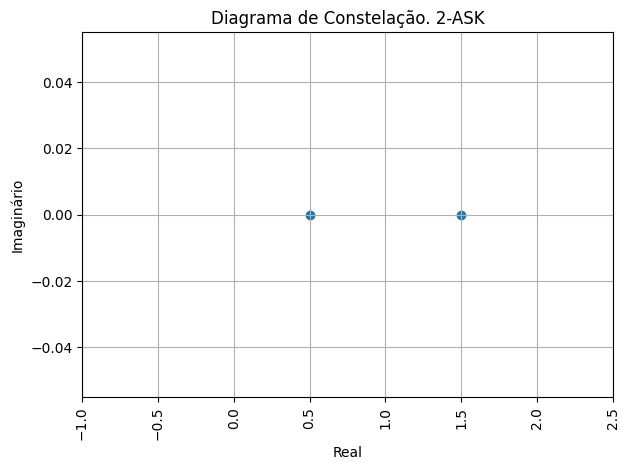

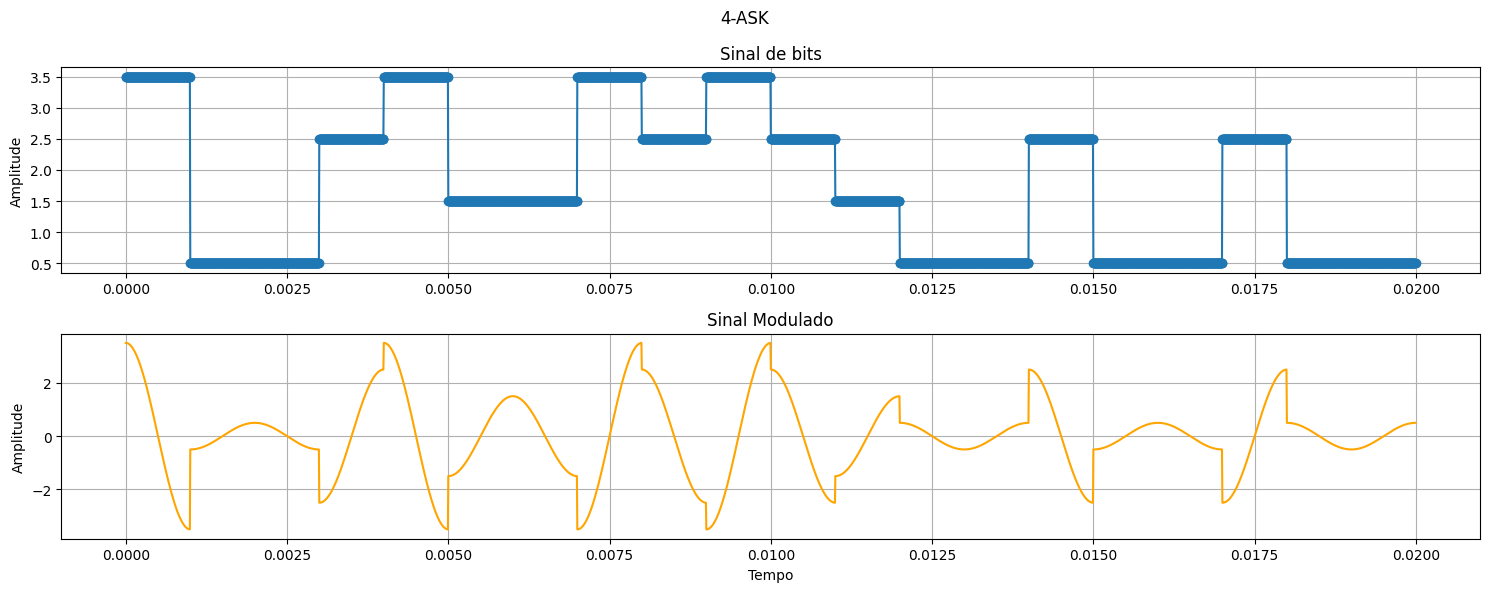

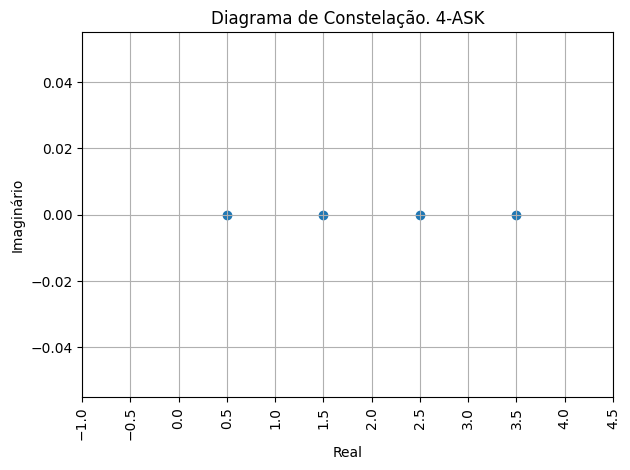

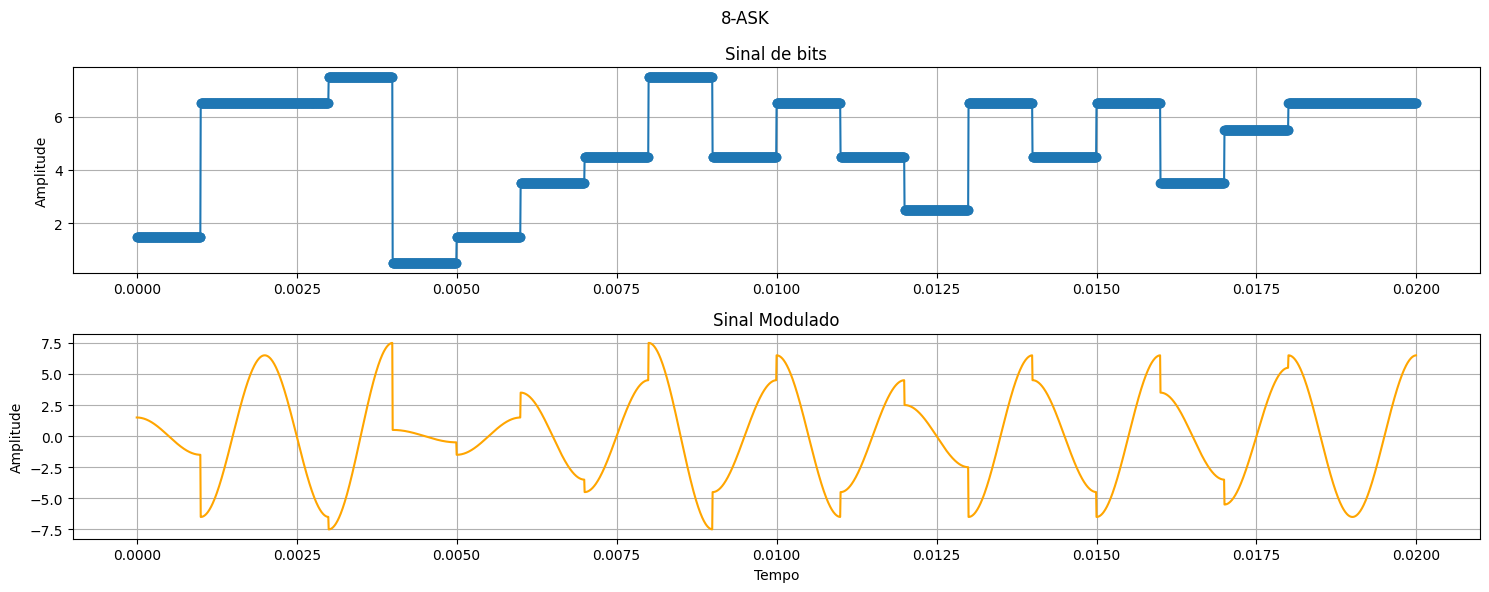

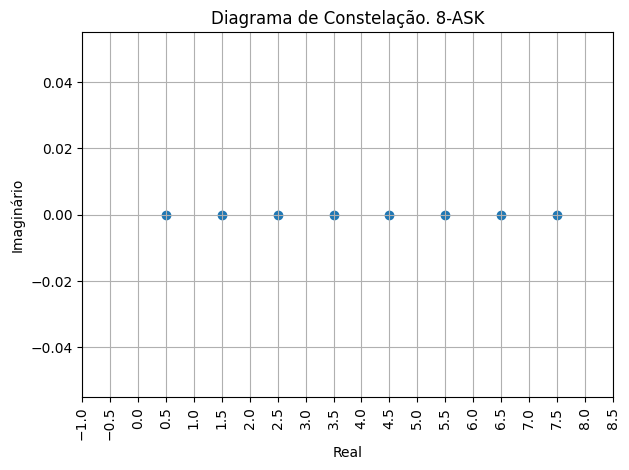

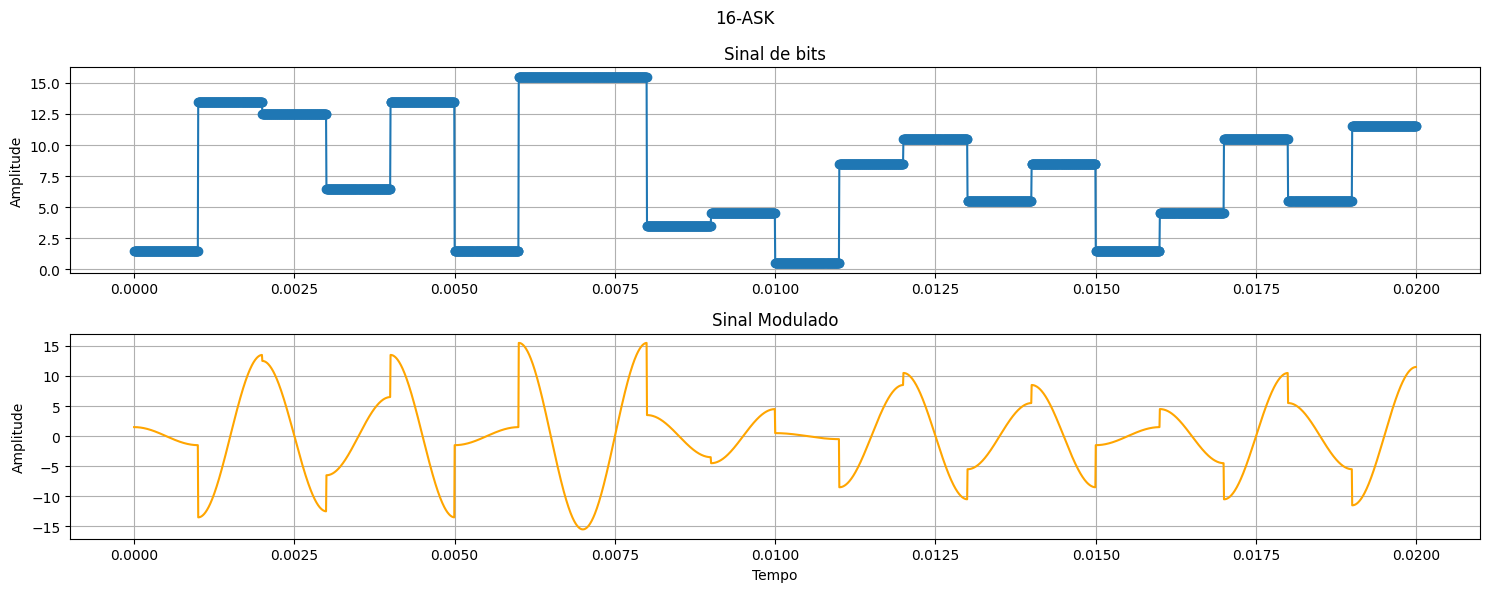

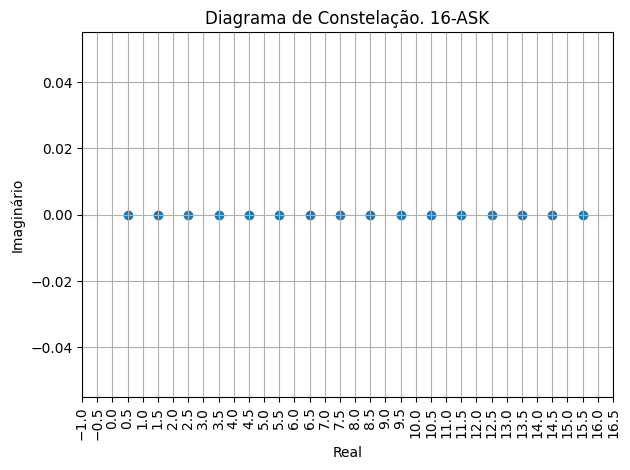

In [19]:
class Ask:
    np.random.seed(40)  # semente para gerar os mesmos números aleatórios

    def __init__(self,portadora,m=2):
        self.amplitudes = lambda x: x+.5 # símbolo:tensão
        self.m = m
        self.portadora = portadora
        self.simbolos = np.random.randint(0,m,n_simbolos)
        self.sinal = np.array([self.amplitudes(s) for s in self.simbolos]) # codifica os símbolos em tensões
        self.sinal = np.repeat(self.sinal,amostras_por_simbolo)
        self.wave = self.sinal*portadora.wave
    
    def show(self):
        """Shows the bit signal and the coded signal in a subplot
        """        
        fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,6))
        
        ax1.plot(tempo[:show_amostras],self.sinal[:show_amostras],marker='o')
        ax2.plot(tempo[:show_amostras],self.wave[:show_amostras],'orange')
        fig.suptitle(f"{self.m}-ASK")
        ax1.set_title("Sinal de bits")
        ax2.set_title("Sinal Modulado")
        ax1.set_ylabel("Amplitude")
        ax2.set_ylabel("Amplitude")
        ax2.set_xlabel("Tempo")
        ax1.grid()
        ax2.grid()
        fig.tight_layout()
        plt.show()

    def constellation(self):
        """Shows the constellation diagram of the signal
        """        
        fig = plt.figure()
        plt.scatter([self.amplitudes(x) for x in range(self.m)],np.zeros(self.m))
        plt.title(f"Diagrama de Constelação. {self.m}-ASK")
        plt.xticks(np.arange(-1,self.m+1,.5),rotation=90)
        plt.ylabel("Imaginário")
        plt.xlabel("Real")
        plt.grid()
        fig.tight_layout()
        plt.show()
# Instancia a classe e mostra o gráfico
for m in 2**np.arange(1,5):
    ask = Ask(portadora,m=m)
    ask.show()
    ask.constellation()

## Demodulador


# D-QPSK


## Modulador

## Demodulador

# M-PSK


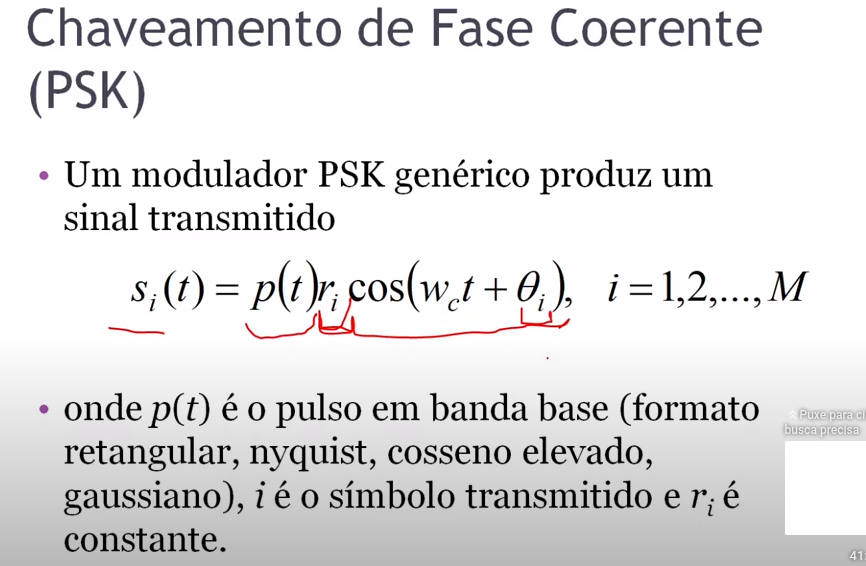


## Modulador


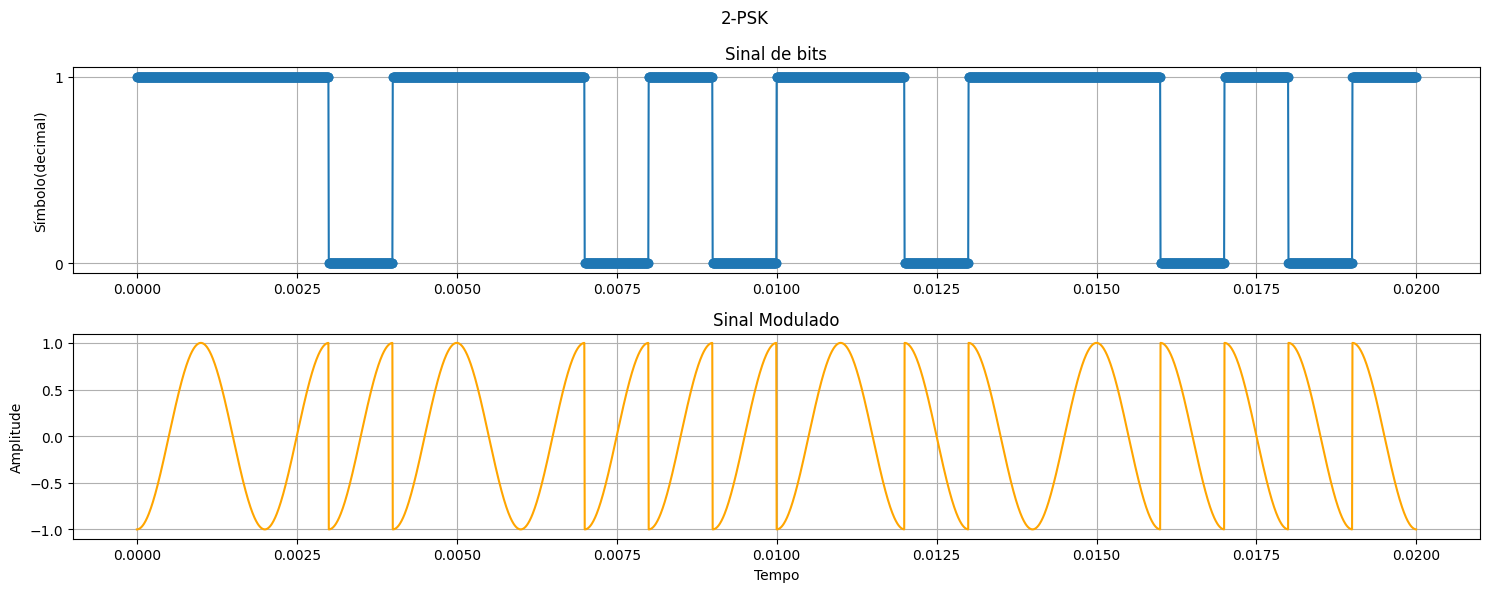

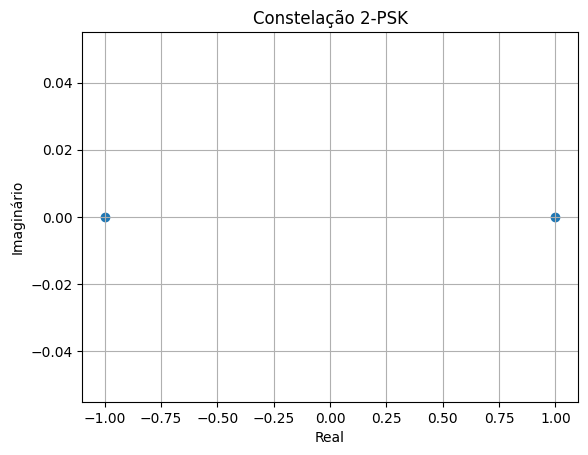

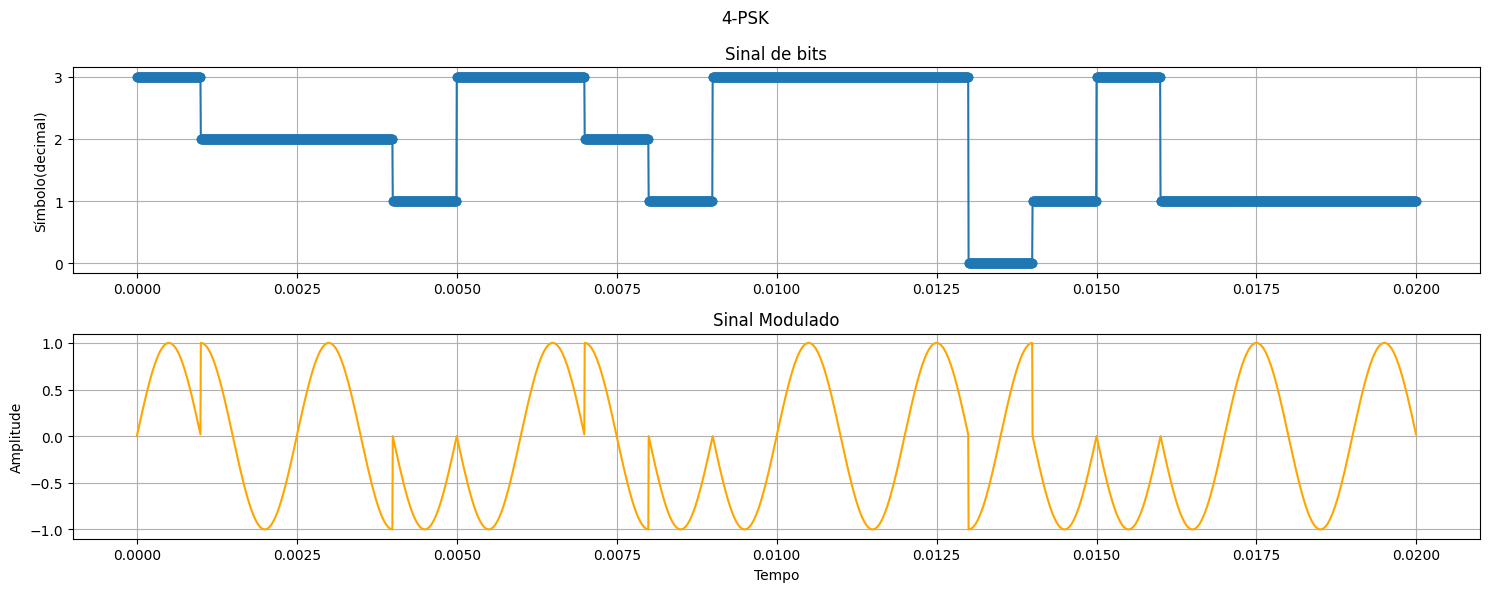

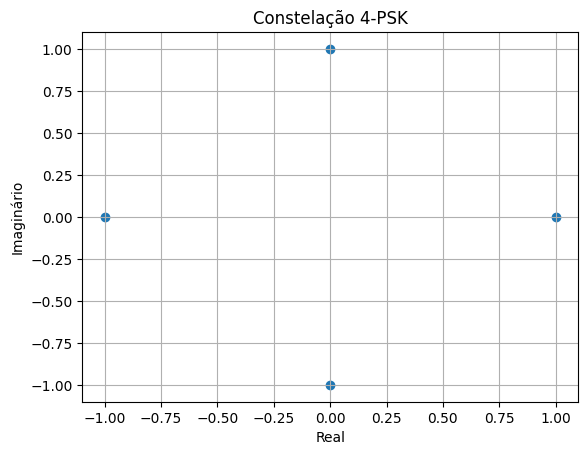

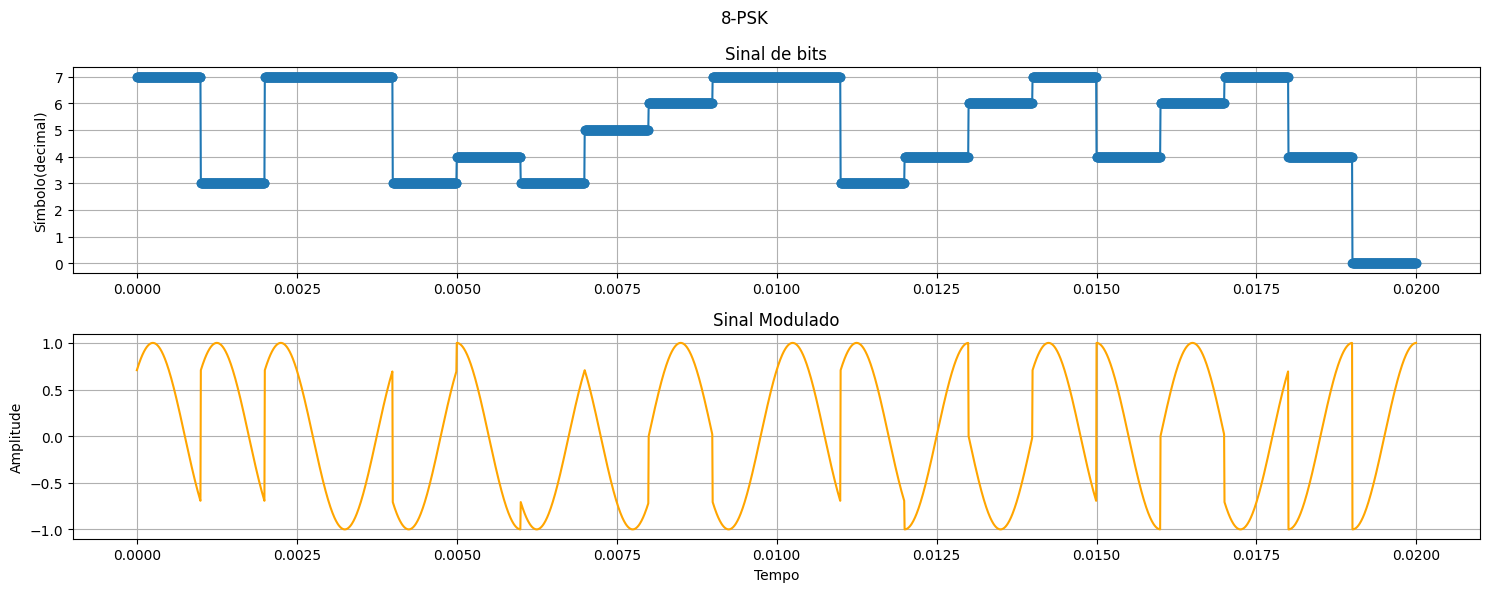

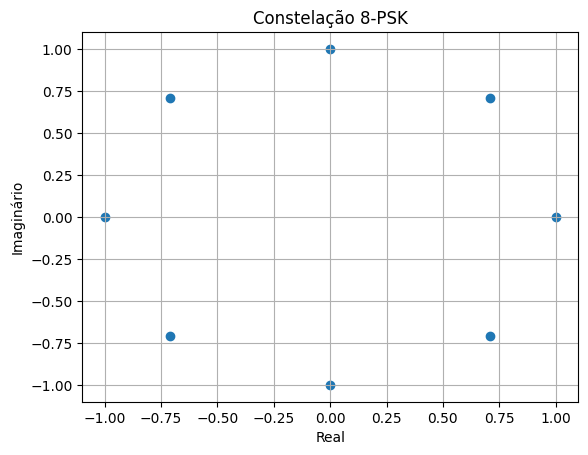

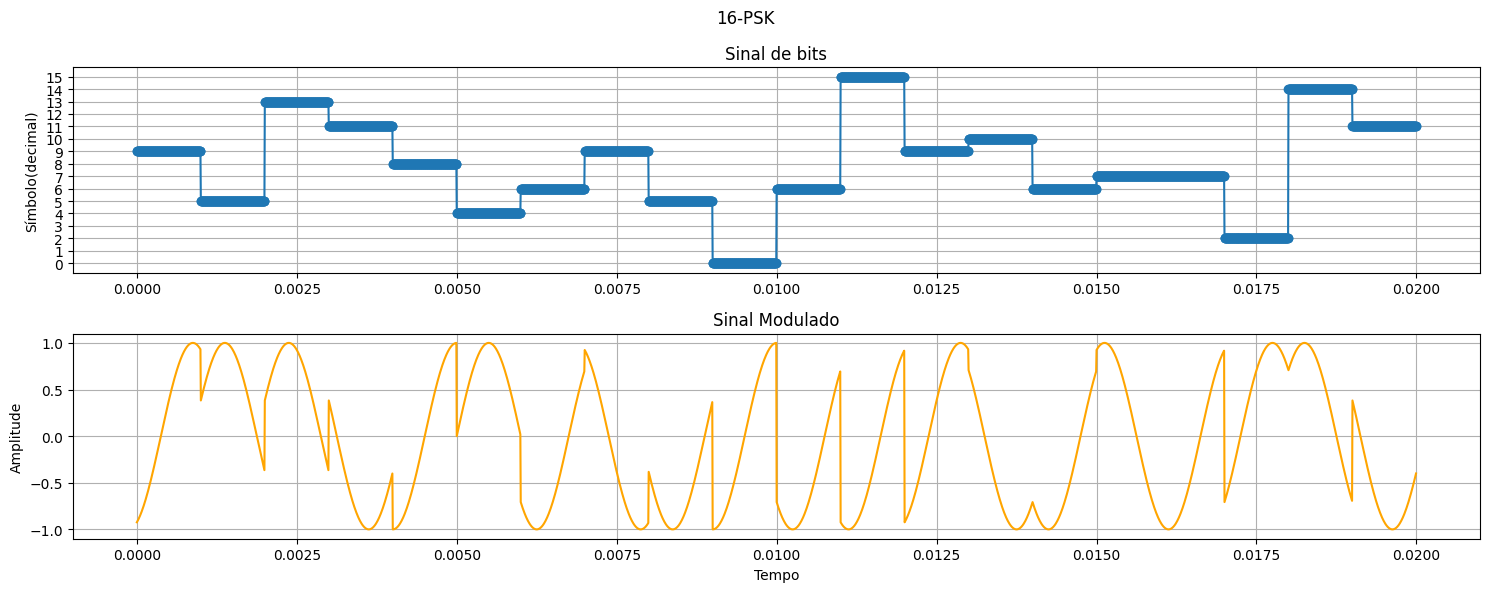

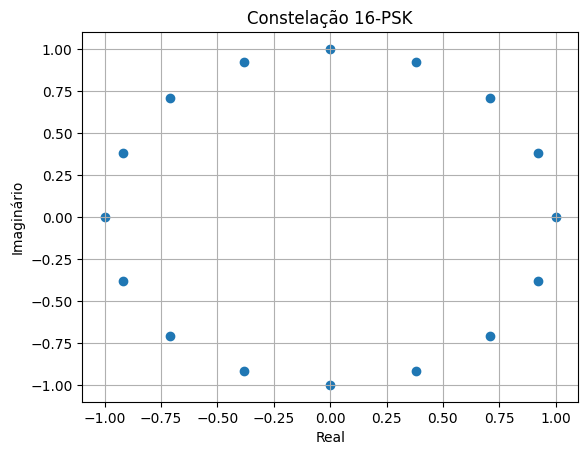

In [26]:
class Psk:
    def __init__(self,portadora,m=2):
        self.fases = np.linspace(0,2*np.pi,m,endpoint=False) # símbolo:fase
        self.portadora = portadora
        self.m= m
        self.simbolos = np.random.randint(0,m,n_simbolos)
        self.simbolos = np.repeat(self.simbolos,amostras_por_simbolo)
        self.sinal = np.cos(frequencia_central*2*np.pi*tempo + self.fases[self.simbolos])
    def show(self):
        fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,6))
        
        ax1.plot(tempo[:show_amostras],self.simbolos[:show_amostras],marker='o')
        ax2.plot(tempo[:show_amostras],self.sinal[:show_amostras],'orange')
        fig.suptitle(f"{self.m}-PSK")
        ax1.set_title("Sinal de bits")
        ax2.set_title("Sinal Modulado")
        ax1.set_ylabel("Símbolo(decimal)")
        ax2.set_ylabel("Amplitude")
        ax2.set_xlabel("Tempo")
        ax1.set_yticks(np.arange(self.m))
        ax1.grid()
        ax2.grid()
        fig.tight_layout()
        plt.show()

    def constellation(self):
        data = np.round(np.exp(1j*self.fases),2)
        plt.scatter(data.real,data.imag)
        plt.grid()
        plt.xlabel('Real')
        plt.ylabel('Imaginário')
        plt.title(f"Constelação {self.m}-PSK")
        plt.show()
    
    def transmit(self):
        ruido = np.random.normal(0,1,len(self.sinal))
for m in 2**np.arange(1,5):
    psk = Psk(portadora,m=m)
    psk.show()
    psk.constellation()

        

## Demodulador


# M-QAM


## Modulador


## Demodulador
